<a href="https://colab.research.google.com/github/vvnssrnath2002/vvnssrnath2002/blob/main/KNN_algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [38]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


In [ ]:
Gender = pd.get_dummies(df['Gender'],drop_first = True)

In [ ]:
df = pd.concat([df,Gender], axis = 1)

In [ ]:
df.drop(['Gender'],axis = 1,inplace = True)

In [ ]:
X = df[['Age','EstimatedSalary','Male']]
y = df['Purchased']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [ ]:
scaled_features = scaler.transform(X)
print(scaled_features)


[[-1.78179743 -1.49004624  1.02020406]
 [-0.25358736 -1.46068138  1.02020406]
 [-1.11320552 -0.78528968 -0.98019606]
 ...
 [ 1.17910958 -1.46068138 -0.98019606]
 [-0.15807423 -1.07893824  1.02020406]
 [ 1.08359645 -0.99084367 -0.98019606]]


In [ ]:
df_feat = pd.DataFrame(scaled_features,columns = X.columns)
df_feat.head()


,Age,EstimatedSalary,Male
0,-1.781797,-1.490046,1.020204
1,-0.253587,-1.460681,1.020204
2,-1.113206,-0.785290,-0.980196
3,-1.017692,-0.374182,-0.980196
4,-1.781797,0.183751,1.020204


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, y, test_size=0.20)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score


In [ ]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear') # ovr--> one versus rest
model = lr.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
report = classification_report(y_test,y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        52
           1       0.86      0.68      0.76        28

    accuracy                           0.85        80
   macro avg       0.85      0.81      0.83        80
weighted avg       0.85      0.85      0.85        80



In [ ]:
proba = model.predict_proba(X_test)
proba_class1 = proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba_class1)
roc_auc = roc_auc_score(y_test, proba_class1)

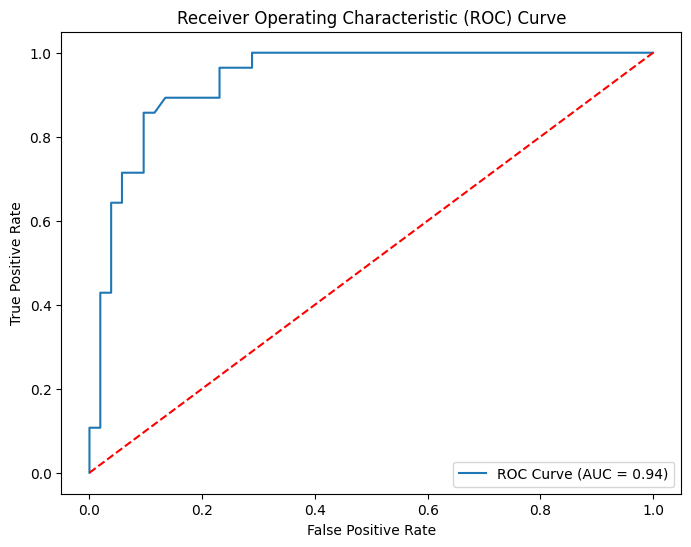

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1],[0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))

[[48  4]
 [ 6 22]]


In [ ]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       0.89      0.92      0.91        52
           1       0.85      0.79      0.81        28

    accuracy                           0.88        80
   macro avg       0.87      0.85      0.86        80
weighted avg       0.87      0.88      0.87        80

